In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [98]:
Cemetery_df = pd.read_excel('../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx', index_col=0) 
Cemetery_df.head()

,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
Volume,,,,,,,,,,,,,
6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


In [99]:
# 2aFind the 10 most common (known) recorded causes of death 
cause_death_count =Cemetery_df['Cause of Death/Burial'].value_counts() 
Top_10_cause_death = cause_death_count.head(10)
print(Top_10_cause_death)

Cause of Death/Burial
Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: count, dtype: int64


In [100]:
#2b Clean up some of the misspellings. Use the [`replace` method]
Cemetery_df.replace('Consumption','tuberculosis',inplace=True )
Cemetery_df.replace('Cholrea','cholera',inplace=True)
Cemetery_df.replace('Flux','dysentery',inplace=True)
Cemetery_df.replace('Still Born','StillBorn',inplace=True)


In [101]:
#2c After correcting the spellings, find the 10 most common causes of death
cause_death_count =Cemetery_df['Cause of Death/Burial'].value_counts() 
Top_10_cause_death = cause_death_count.head(10)
print(Top_10_cause_death)

Cause of Death/Burial
tuberculosis    1767
Unknown         1260
StillBorn        841
cholera          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
dysentery        469
Complication     446
Name: count, dtype: int64


Text(0.5, 1.0, '10 most commen known death')

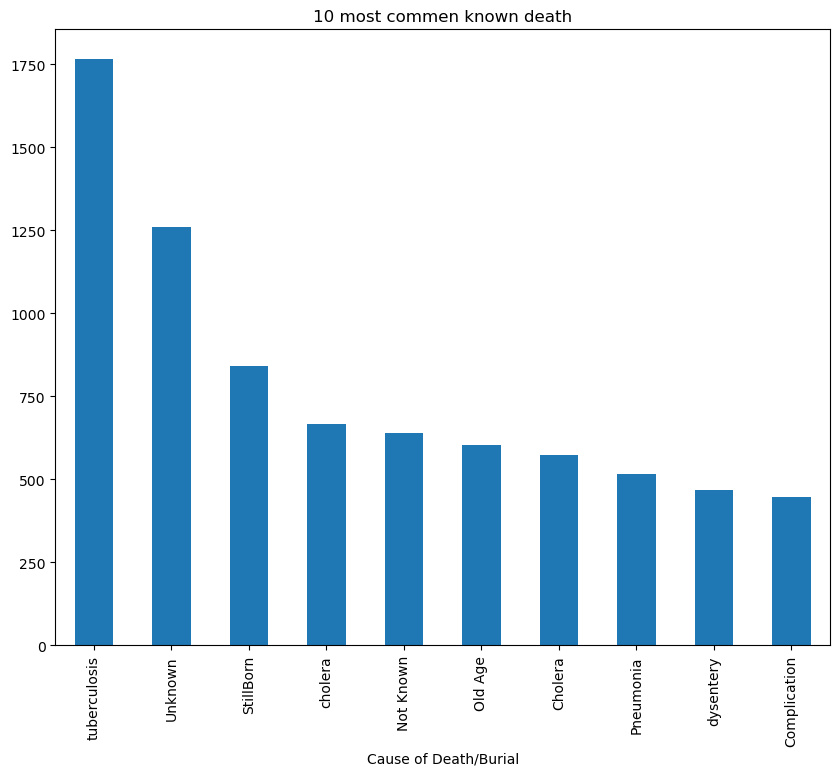

In [102]:
# find the 10 most common causes of death and create a bar chart to display your findings.
Top_10_cause_death.plot(kind='bar',figsize=(10,8))
plt.title('10 most commen known death')

<Axes: xlabel='Burial Year', ylabel='count'>

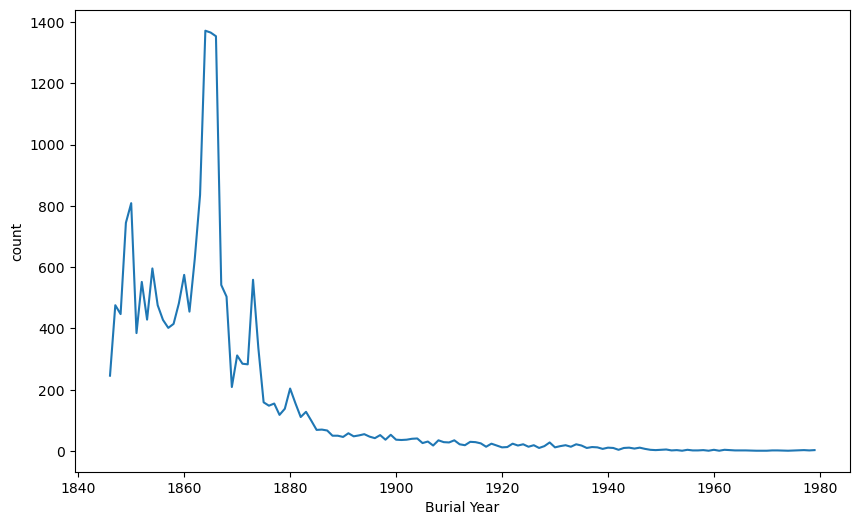

In [103]:
# 3.Create a line chart showing the number of burials per year
Cemetery_df['count'] = 1
Cemetery_df_grouped = pd.DataFrame(Cemetery_df.groupby(["Burial Year"]).count().loc[:, "count"])
plt.figure(figsize = (10,6))
sns.lineplot(data=Cemetery_df_grouped, x="Burial Year", y="count")

In [104]:
# 4a Use the [ to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.
pd.crosstab(Cemetery_df['Burial Year'],Cemetery_df['Burial Month'],rownames=['Burial Year'],colnames=['Burial Month'])

Burial Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Burial Year,,,,,,,,,,,,
1846.0,22,0,30,26,20,0,0,25,26,23,39,35
1847.0,35,61,34,34,43,40,47,38,26,36,47,35
1848.0,37,39,27,36,36,65,47,49,41,21,26,23
1849.0,43,36,33,64,46,96,231,64,62,24,18,28
1850.0,29,52,31,26,24,370,120,43,37,28,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...
1972.0,1,0,0,0,0,0,0,0,0,0,0,0
1974.0,0,0,0,0,0,0,0,0,0,1,0,0
1977.0,0,0,0,0,0,0,0,1,1,1,0,0


In [105]:
#4b  make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly. 
 
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Cemetery_df['Burial Month'] = pd.Categorical(Cemetery_df['Burial Month'], categories=months, ordered=True)
Cemetery_df['Burial Year'] = Cemetery_df['Burial Year'].astype("Int64")
Cemetery_df['Burial Year'] = Cemetery_df['Burial Year'].fillna(0)
pd.crosstab(Cemetery_df['Burial Year'],Cemetery_df['Burial Month'],rownames=['Burial Year'],colnames=['Burial Month'])


Burial Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Burial Year,,,,,,,,,,,,
0,0,0,0,2,0,0,0,0,0,0,0,0
1846,20,26,25,22,26,0,0,0,35,39,23,30
1847,43,34,38,35,26,47,40,61,35,47,36,34
1848,36,36,49,37,41,47,65,39,23,26,21,27
1849,46,64,64,43,62,231,96,36,28,18,24,33
...,...,...,...,...,...,...,...,...,...,...,...,...
1972,0,0,0,1,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,1,0
1977,0,0,1,0,1,0,0,0,0,0,1,0


In [ ]:
#4c Filter your table to show only the years 1846 through 1860